In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") # отключаем предупреждения 
%matplotlib inline

In [2]:
data = pd.read_csv('credit.csv', encoding='cp1251', delimiter=';')

In [3]:
data.head().T

,0,1,2,3,4
client_id,1,2,3,4,5
gender,M,F,M,F,M
age,NaN,NaN,32.0,27.0,45.0
marital_status,NaN,MAR,MAR,NaN,NaN
job_position,UMN,UMN,SPC,SPC,SPC
credit_sum,"59998,00","10889,00","10728,00","12009,09",NaN
credit_month,10,6,12,12,10
tariff_id,1.6,1.1,1.1,1.1,1.1
score_shk,NaN,NaN,NaN,NaN,"0,421385"
education,GRD,NaN,NaN,NaN,SCH


In [4]:
# проверяем типы данных и заполненность столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [5]:
# или можем посмотреть так 
data.isna().any()
# data.isnull().sum()

client_id               False
gender                  False
age                      True
marital_status           True
job_position            False
credit_sum               True
credit_month            False
tariff_id               False
score_shk                True
education                True
living_region            True
monthly_income           True
credit_count             True
overdue_credit_count     True
open_account_flg        False
dtype: bool

# Очистка данных 

In [6]:
# посмотрим столбец marital_status и узнаем какое значение в нем является самым частым 
data.marital_status.describe()

count     170743
unique         5
top          MAR
freq       93954
Name: marital_status, dtype: object

In [7]:
# посмотрим столбец education и узнаем какое значение в нем является самым частым 
data.education.describe()

count     170741
unique         5
top          SCH
freq       87537
Name: education, dtype: object

In [8]:
# посмотрим столбец living_region и узнаем какое значение в нем является самым частым 
data.living_region.describe() 

count             170554
unique               301
top       ОБЛ МОСКОВСКАЯ
freq               12228
Name: living_region, dtype: object

In [9]:
# заполним нечисловые столбцы с пропусками самыми часто встречающимися значениями
data.marital_status.fillna('MAR', inplace=True)
data.education.fillna('SCH', inplace=True)
data.living_region.fillna("ОБЛ МОСКОВСКАЯ", inplace = True)

In [10]:
# заполним числовые столбцы с пропусками медианными значениями
data.age.fillna(data.age.median(), inplace=True)
data.credit_count.fillna(data.credit_count.median(), inplace=True)
data.overdue_credit_count.fillna(data.overdue_credit_count.median(), inplace=True)

In [11]:
#  в столбцах 'credit_sum', 'score_shk' поменяем запятые на точки и преобразуем их в числовой  формат
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [12]:
# теперь числовыми столбцы 'credit_sum', 'score_shk' заполним медианными значениями
data.score_shk.fillna(data.score_shk.median(), inplace=True)
data.monthly_income.fillna(data.monthly_income.median(), inplace=True)
data.credit_sum.fillna(data.credit_sum.median(), inplace=True)

In [13]:
# смотрим, что получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170746 non-null  float64
 3   marital_status        170746 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170746 non-null  float64
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170746 non-null  float64
 9   education             170746 non-null  object 
 10  living_region         170746 non-null  object 
 11  monthly_income        170746 non-null  float64
 12  credit_count          170746 non-null  float64
 13  overdue_credit_count  170746 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

# Обработка числовых столбцов

In [14]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])
print(num_attributes.columns)

Index(['client_id', 'age', 'credit_sum', 'credit_month', 'tariff_id',
       'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count',
       'open_account_flg'],
      dtype='object')


In [15]:
num_attributes.drop(['client_id'], axis=1, inplace=True)

## Визуализация данных

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'credit_sum'}>,
        <AxesSubplot:title={'center':'credit_month'}>],
       [<AxesSubplot:title={'center':'tariff_id'}>,
        <AxesSubplot:title={'center':'score_shk'}>,
        <AxesSubplot:title={'center':'monthly_income'}>],
       [<AxesSubplot:title={'center':'credit_count'}>,
        <AxesSubplot:title={'center':'overdue_credit_count'}>,
        <AxesSubplot:title={'center':'open_account_flg'}>]], dtype=object)

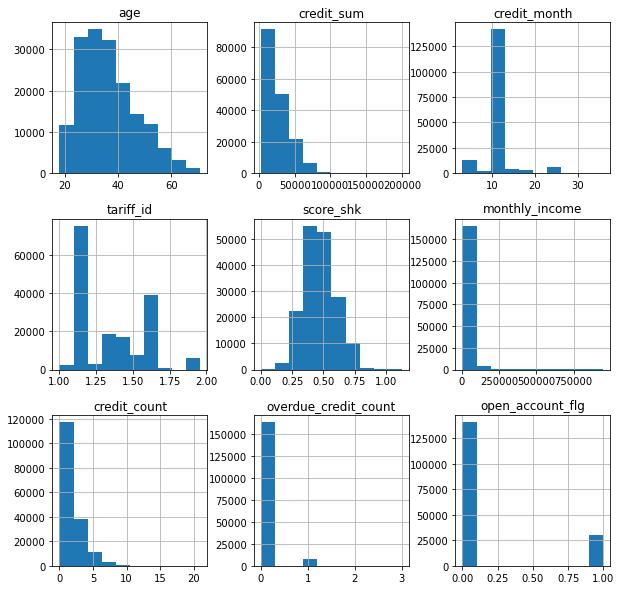

In [16]:
num_attributes.hist(figsize=(10,10))

In [17]:
num_attributes.describe()

,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000
mean,36.497218,26095.040543,10.980749,1.323900,0.469473,40138.445674,2.101508,0.043579,0.176028
std,10.545957,16234.787554,3.536698,0.235813,0.124263,25044.022734,1.728598,0.206014,0.380845
min,18.000000,2736.000000,3.000000,1.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,28.000000,14908.000000,10.000000,1.100000,0.379549,25000.000000,1.000000,0.000000,0.000000
50%,34.000000,21229.000000,10.000000,1.320000,0.461599,35000.000000,2.000000,0.000000,0.000000
75%,43.000000,32068.000000,12.000000,1.600000,0.552396,50000.000000,3.000000,0.000000,0.000000
max,71.000000,200000.000000,36.000000,1.960000,1.128291,950000.000000,21.000000,3.000000,1.000000


# Обработка категориальных столбцов

In [18]:
cat_attributes = data.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['gender', 'marital_status', 'job_position', 'education',
       'living_region'],
      dtype='object')


## Визуализация данных

<AxesSubplot:xlabel='count', ylabel='job_position'>

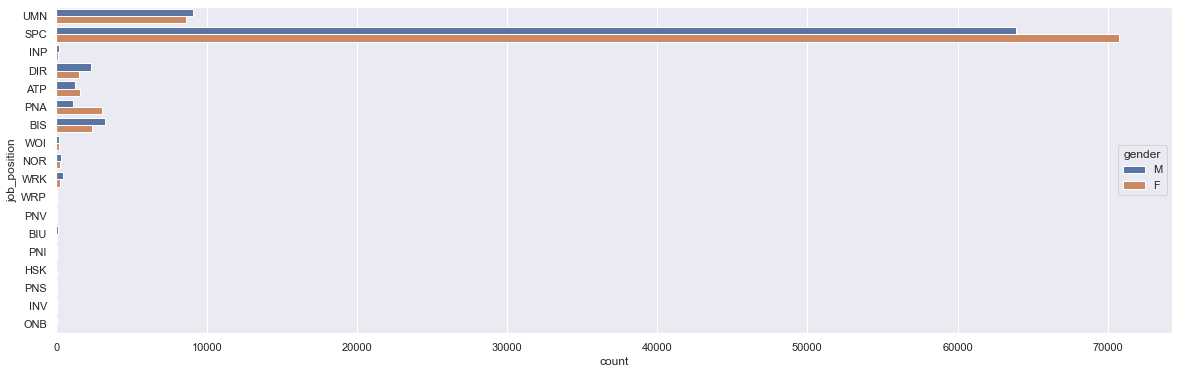

In [19]:
sns.set(rc={'figure.figsize':(20, 6)})
sns.countplot(y='job_position', hue='gender', data = cat_attributes)

<AxesSubplot:xlabel='count', ylabel='marital_status'>

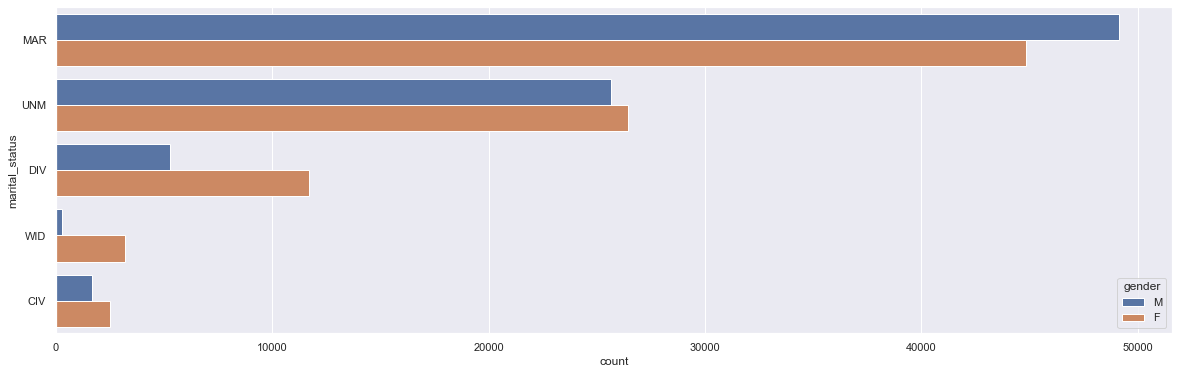

In [20]:
sns.countplot(y='marital_status', hue='gender', data=cat_attributes)

<AxesSubplot:xlabel='count', ylabel='education'>

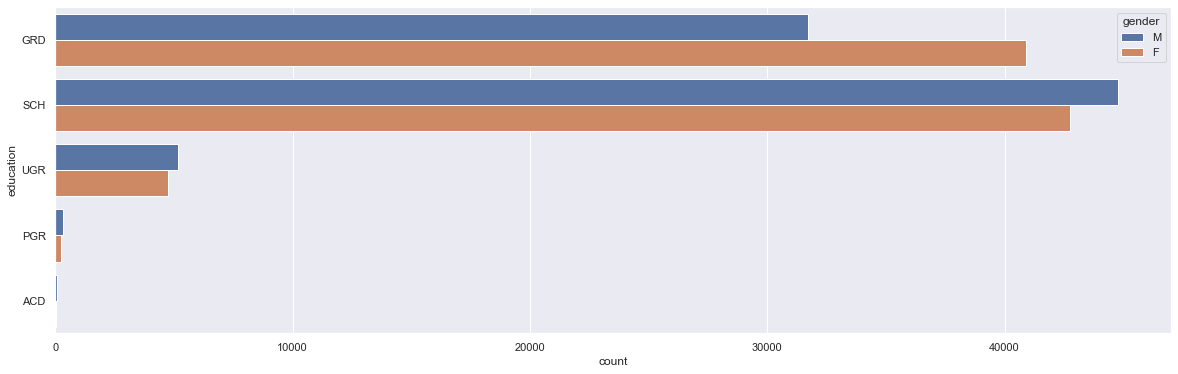

In [21]:
sns.countplot(y='education', hue='gender', data=cat_attributes)

# Подготовим данные для графиков 

In [22]:
print("marital_status : ", data.marital_status.unique())
print("gender : ", data.gender.unique())
print("job_position : ", data.job_position.unique())
print("education : ", data.education.unique())

marital_status :  ['MAR' 'UNM' 'DIV' 'WID' 'CIV']
gender :  ['M' 'F']
job_position :  ['UMN' 'SPC' 'INP' 'DIR' 'ATP' 'PNA' 'BIS' 'WOI' 'NOR' 'WRK' 'WRP' 'PNV'
 'BIU' 'PNI' 'HSK' 'PNS' 'INV' 'ONB']
education :  ['GRD' 'SCH' 'UGR' 'PGR' 'ACD']


In [23]:
# подготовим данные для построение графиков 
# переведем категориальные столбцы в числовые 
data.marital_status = data.marital_status.map({'MAR':0, 'UNM':1, 'DIV':2, 'WID':3, 'CIV':4}).astype('int64')

data.gender = data.gender.map({'M':0, 'F':1}).astype('int64')

data.job_position = data.job_position.map({'UMN':0, 'SPC':1, 'INP':2, 'DIR':3, 'ATP':4, 'PNA':5,
                                           'BIS':6, 'WOI':7, 'NOR':8, 'WRK':9, 'WRP':10, 'PNV':10,
                                           'BIU':11, 'PNI':12, 'HSK':13, 'PNS':14, 'INV':15, 'ONB': 16}).astype('int64')

data.education = data.education.map({'GRD':0, 'SCH':1, 'UGR':2, 'PGR':3, 'ACD':4}).astype('int64')

# удалим лишние столбцы 
data.drop(['client_id', 'living_region'], axis=1, inplace=True)

data.head(10)

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,0,34.0,0,0,59998.00,10,1.6,0.461599,0,30000.0,1.0,1.0,0
1,1,34.0,0,0,10889.00,6,1.1,0.461599,1,35000.0,2.0,0.0,0
2,0,32.0,0,1,10728.00,12,1.1,0.461599,1,35000.0,5.0,0.0,0
3,1,27.0,0,1,12009.09,12,1.1,0.461599,1,35000.0,2.0,0.0,0
4,0,45.0,0,1,21229.00,10,1.1,0.421385,1,35000.0,1.0,0.0,0
5,1,34.0,0,1,21229.00,10,1.1,0.461599,1,30000.0,0.0,0.0,0
6,0,34.0,0,1,10317.00,6,1.5,0.461599,1,28000.0,3.0,0.0,0
7,1,26.0,1,1,47878.00,10,1.1,0.512525,0,60000.0,3.0,0.0,0
8,0,23.0,1,1,37577.16,12,1.6,0.461599,1,50000.0,3.0,0.0,0
9,1,32.0,1,1,26268.00,10,1.1,0.465026,0,39500.0,7.0,0.0,0


# Графики

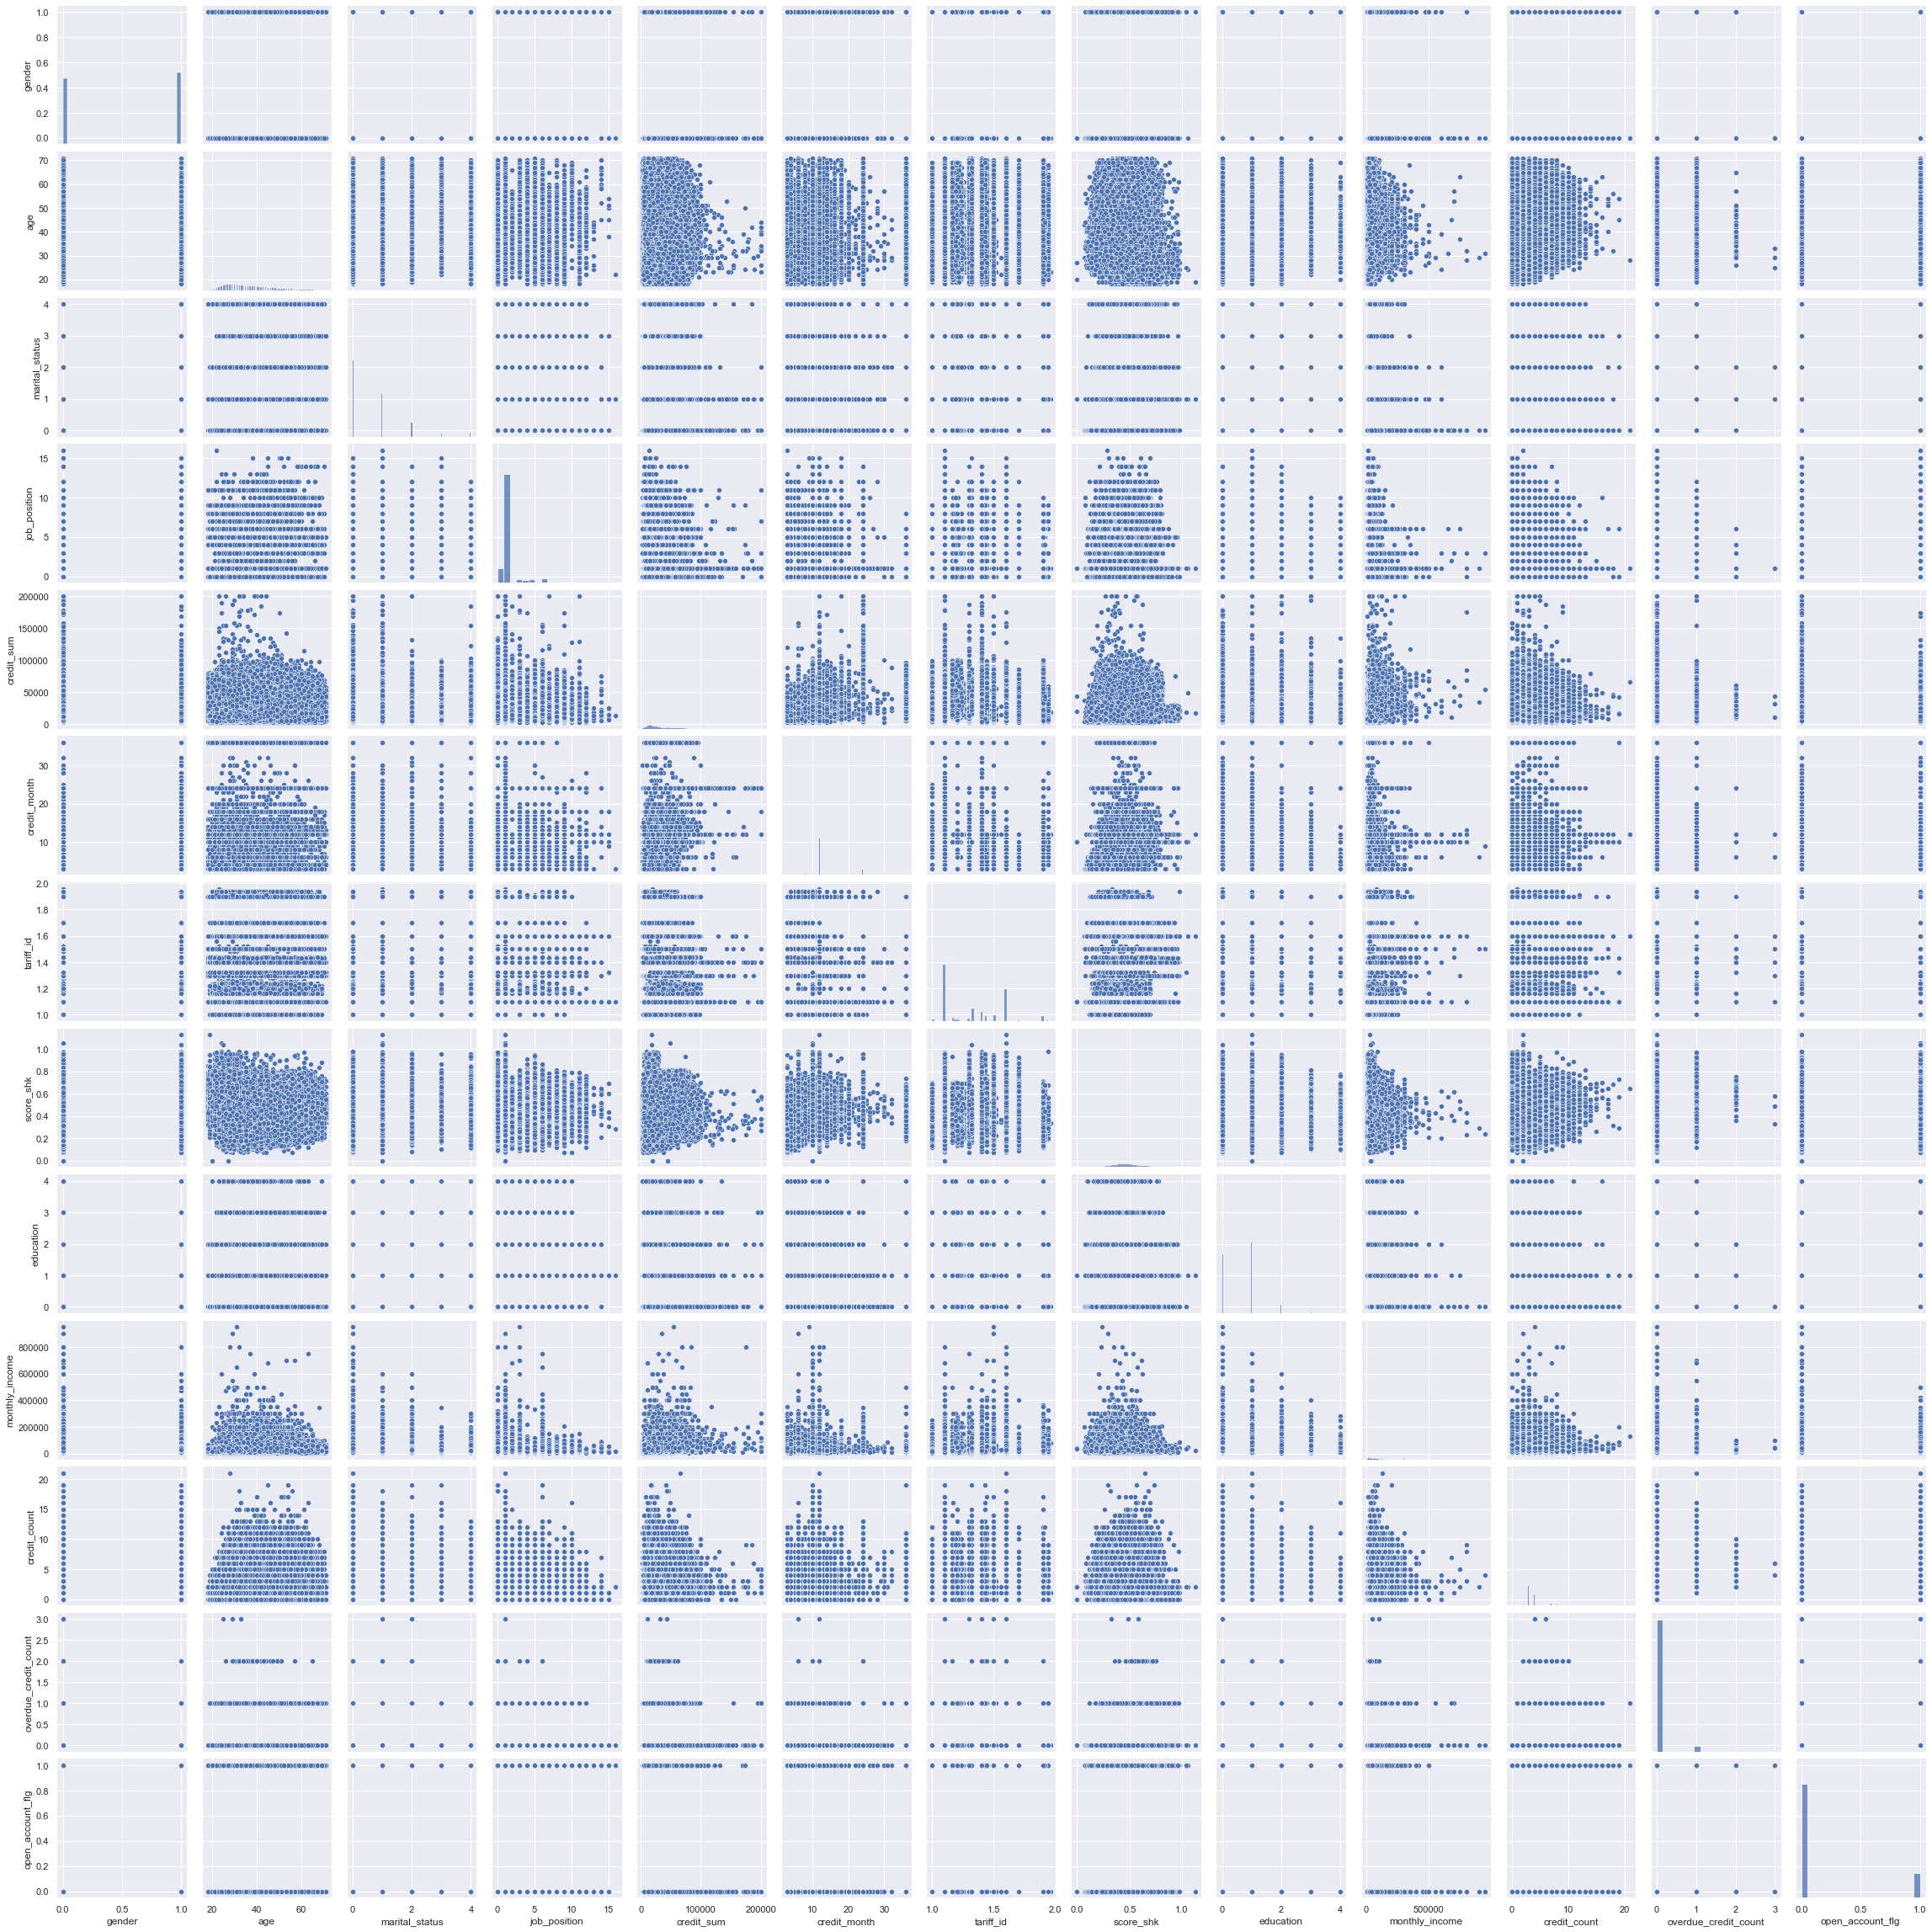

In [24]:
sns.pairplot(data)

<Figure size 1440x432 with 0 Axes>

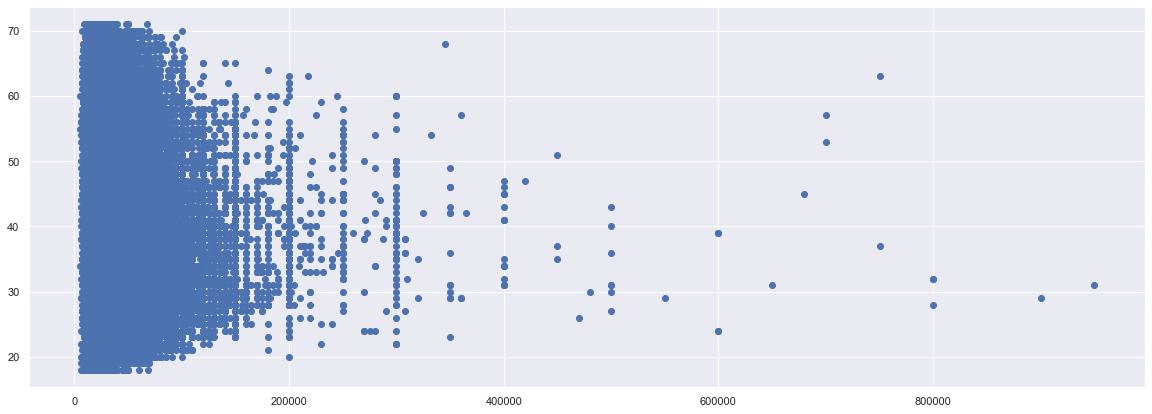

<Figure size 1440x432 with 0 Axes>

In [25]:
# график соотношение зп и возраста 
plt.figure(figsize=(20, 7))
plt.scatter(data.monthly_income, data.age)
plt.figure()

<Figure size 1440x432 with 0 Axes>

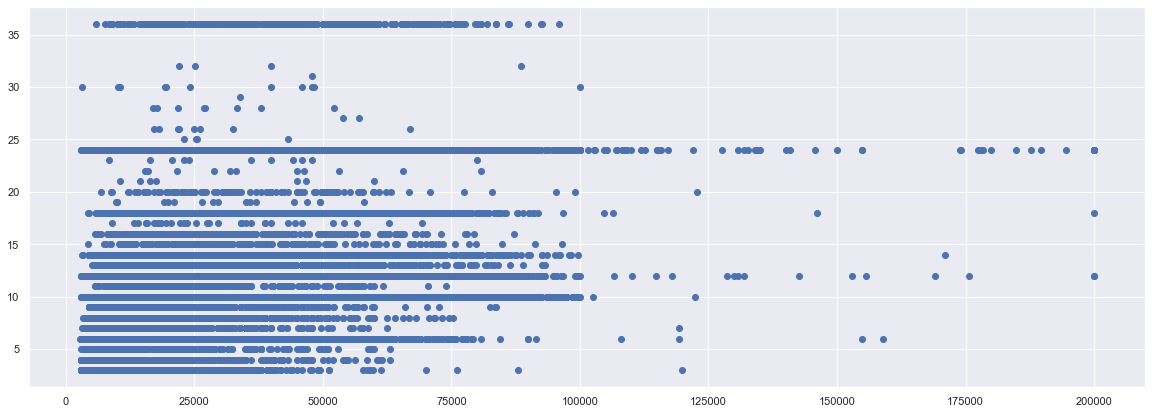

<Figure size 1440x432 with 0 Axes>

In [26]:
# график соотношение суммы кредита и на сколько его взяли 
plt.figure(figsize=(20, 7))
plt.scatter(data.credit_sum, data.credit_month)
plt.figure()